In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits.basemap import Basemap

In [22]:
### Ground Tracks ###

In [23]:
# General Method to get ground tracks
#
#
#Given a set of initial conditions in ECI coordinates we can now predict satellite trajectory using the following steps
#
# let X_bar(t0) = initial state
#
# 1) Convert ECI to Keplerian Elements (CAR2KEP) at t=t0
# 2) For a given number of time steps:
#        Use Keplerian prediction algorithm to obtain X_bar(t0+dt)
#        Use ECI to ECEF to convert X_bar(t0+dt) to X_bar_ECEF
#        Convert X_bar_ECEF to lat/long/height
#        Write timetag lat/long/height to file (maybe pandas dataframe)
#        Set t0  = t+dt #increment the timetag
#        Set X_bar(t0) = X_bar(t0+dt) #update the state
#        End of for loop
#Once a file with t,phi,lambda,h is made, it can be plotted into a map

In [24]:
# Getting lat/long/heihgt from ECEF coordinates
# Lambda = Longitude
# Phi = Latitude
# P = point coordinate vector (x,y,z)
# P_x = x-coordinate of the point p
# P_y = y-coordinate of the point p
# P_z = z-coordinate of the point p
# r_mag = magnitude of the radius vector of the satellite
# e = east unit vector 
# n = north unit vector 
# u = up unit vector
RE =6367 #= Earth Radius in km 

In [25]:
#Example coordinates(from orbit propagation example):
#
P_x = -7134.401598
P_y = -1344.205350
P_z = 2616.199171
#time t = 0
#u = 2.737023
#v = -2.641275
#w = 2.737023

In [26]:
#Calculating Longitude
Lambda_rad = np.arctan2(P_x,P_y) #This is in radians 
long = Lambda_rad * (180/np.pi) # Converting to degrees
print ('Longitude:',long)

Longitude: -100.67011420231549


In [27]:
#Calculating Latitude
Phi_rad = math.atan(P_z/(np.sqrt(P_x**2+P_y**2))) #This is in radians 
lat = Phi_rad * (180/np.pi) # Converting to degrees
print ('Latitude:',lat)

Latitude: 19.81721128996098


In [28]:
# Height is defined with respect to a crude planet model
# For our purposes we will use the following model 
# Radius at equator = 6378km
# Radius at Pole = 6356
# Average radius = 6367km - we will take this as our earth radius 
# Height is equal to the magnitude of the radius vector - Re

#Calculating the radius vector magnitude
r_mag = np.sqrt((P_x**2)+(P_y**2)+(P_z**2))

h = r_mag - RE #

print('height in kilometres:',h)


height in kilometres: 1349.934124822802


In [29]:
#Adding the lat/long/height to a pandas data frame

GroundTracks = pd.DataFrame ({"Lat":[lat], 
                              "Long":[long],
                              "Height": [h]})
    

GroundTracks

,Lat,Long,Height
0,19.817211,-100.670114,1349.934125


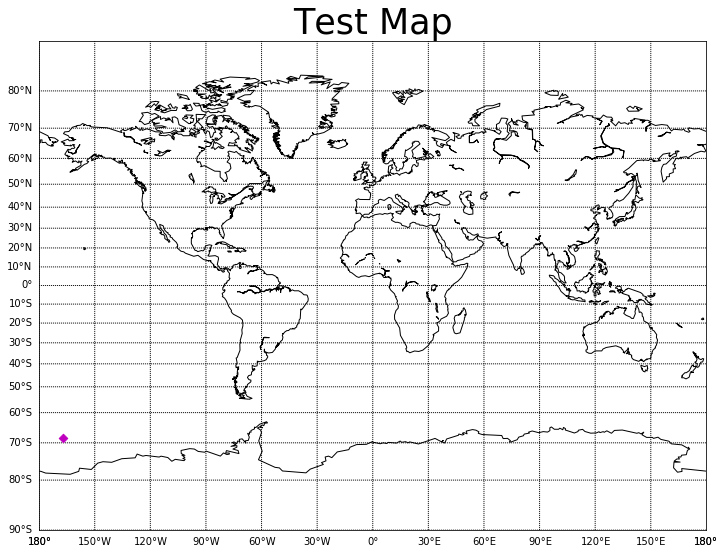

In [12]:
fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill', 
              llcrnrlat = -90,
              urcrnrlat = 90,
              llcrnrlon = -180,
              urcrnrlon = 180,
              resolution = 'c')

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])


lons = [-100.670114]
lats = [ 19.817211]

x, y = map(lons, lats)

m.scatter(x, y, marker='D',color='m',zorder=5)
plt.title('Test Map', fontsize = 35)
plt.show()